# Recomendation using Collaborative Filtering

is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

we try to use embedding and also build neural network for a model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model


In [2]:
from google.colab import files
uploaded = files.upload()

Saving tourism_rating.csv to tourism_rating.csv


## upload data

In [3]:
tourism = pd.read_csv('tourism_rating.csv')

In [4]:
tourism.shape

(10000, 3)

In [5]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [6]:
tourism.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


## MinMaxScaler Rating ke 0 -1
**MinMaxScaler adalah salah satu jenis scaler dalam pemrosesan data pada machine learning yang digunakan untuk mengubah skala data menjadi dalam rentang nilai tertentu, yaitu 0 hingga 1. Scaler rating jadi 0 sampai 1**

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tourism['Place_Ratings'] = tourism['Place_Ratings'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(tourism['Place_Ratings'].values.reshape(-1,1)))
tourism['Place_Ratings'] = rating_scaled

In [8]:
tourism['Place_Ratings']

0       0.50
1       0.25
2       1.00
3       0.50
4       0.75
        ... 
9995    0.25
9996    0.75
9997    0.50
9998    0.75
9999    0.25
Name: Place_Ratings, Length: 10000, dtype: float64

## Split data for training 80% and for test 20%

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tourism, test_size=0.15, random_state=42)

In [10]:
train.head()

,User_Id,Place_Id,Place_Ratings
8701,262,269,0.50
3429,105,236,0.00
8870,267,236,1.00
6962,209,36,0.75
2088,64,305,0.25


In [11]:
test.head()

,User_Id,Place_Id,Place_Ratings
6252,188,207,0.50
4684,142,268,0.25
1731,54,103,0.50
4742,144,119,0.50
4521,138,288,1.00


In [12]:
n_users = len(tourism.User_Id.unique())
n_users

300

In [13]:
n_tourisms = len(tourism.Place_Id.unique())
n_tourisms

437

## Neural Network

In [17]:
# Define input and output features
input_features = ['User_Id', 'Place_Id']
output_feature = 'Place_Ratings'

# Create input tensors
user_input = tf.keras.layers.Input(shape=[1], name="User-Input")
tourism_input = tf.keras.layers.Input(shape=[1], name="Tourism-Input")

# Embed user and tourism IDs
user_embedding = tf.keras.layers.Embedding(input_dim=train['User_Id'].max()+1, output_dim=5, name="User-Embedding")(user_input)
tourism_embedding = tf.keras.layers.Embedding(input_dim=train['Place_Id'].max()+1, output_dim=5, name="Tourism-Embedding")(tourism_input)

# Flatten embeddings
user_vec = tf.keras.layers.Flatten(name="Flatten-Users")(user_embedding)
tourism_vec = tf.keras.layers.Flatten(name="Flatten-Tourism")(tourism_embedding)

# Concatenate embeddings
concat = tf.keras.layers.Concatenate()([user_vec, tourism_vec])

# Add fully-connected layers
fc1 = tf.keras.layers.Dense(128, activation='relu')(concat)
dropout1 = tf.keras.layers.Dropout(0.5)(fc1)
fc2 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.2)(fc2)
fc3 = tf.keras.layers.Dense(16, activation='relu')(dropout2)
dropout3 = tf.keras.layers.Dropout(0.1)(fc3)
output = tf.keras.layers.Dense(1, activation='relu')(dropout3)

# Create model
model = tf.keras.Model(inputs=[user_input, tourism_input], outputs=output)

# Compile model
model.compile(loss='mse', optimizer='adam')

# Train model
#history = model.fit([train['User_Id'], train['Place_Id']], train['Place_Ratings'], validation_data=([[test['User_Id'], test['Place_Id']], test['Place_Ratings']]),
          #epochs=40, batch_size=16)

history = model.fit([train['User_Id'], train['Place_Id']], train['Place_Ratings'], 
          epochs=40, batch_size=16)

Epoch 1/40
532/532 [==============================] - 3s 3ms/step - loss: 0.1321
Epoch 2/40
532/532 [==============================] - 2s 3ms/step - loss: 0.1219
Epoch 3/40
532/532 [==============================] - 1s 2ms/step - loss: 0.1174
Epoch 4/40
532/532 [==============================] - 1s 2ms/step - loss: 0.1159
Epoch 5/40
532/532 [==============================] - 1s 2ms/step - loss: 0.1129
Epoch 6/40
532/532 [==============================] - 1s 2ms/step - loss: 0.1115
Epoch 7/40
532/532 [==============================] - 1s 2ms/step - loss: 0.1091
Epoch 8/40
532/532 [==============================] - 1s 2ms/step - loss: 0.1056
Epoch 9/40
532/532 [==============================] - 1s 2ms/step - loss: 0.1027
Epoch 10/40
532/532 [==============================] - 1s 2ms/step - loss: 0.0997
Epoch 11/40
532/532 [==============================] - 1s 2ms/step - loss: 0.0969
Epoch 12/40
532/532 [==============================] - 1s 2ms/step - loss: 0.0938
Epoch 13/40
532/532 [====

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Tourism-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         1505        ['User-Input[0][0]']             
                                                                                                  
 Tourism-Embedding (Embedding)  (None, 1, 5)         2190        ['Tourism-Input[0][0]']          
                                                                                              

In [19]:
tourism

,User_Id,Place_Id,Place_Ratings
0,1,179,0.50
1,1,344,0.25
2,1,5,1.00
3,1,373,0.50
4,1,101,0.75
...,...,...,...
9995,300,425,0.25
9996,300,64,0.75
9997,300,311,0.50
9998,300,279,0.75


In [20]:
tourism_list = tourism[['Place_Id']].drop_duplicates().sort_values('Place_Id').reset_index(drop=True)

user_id = 26

tourism_indices = test[test['User_Id'] == user_id]['Place_Id'].values

predictions = []
for idx in tourism_indices:
    tourism_id = idx
    predictions.append(tourism_id)


prediction_table = pd.DataFrame(predictions, columns=['Place ID'])

print("Top recommended places for user", user_id, ":")
prediction_table.head()

Top recommended places for user 26 :


,Place ID
0,49
1,211
2,83
3,167
4,251


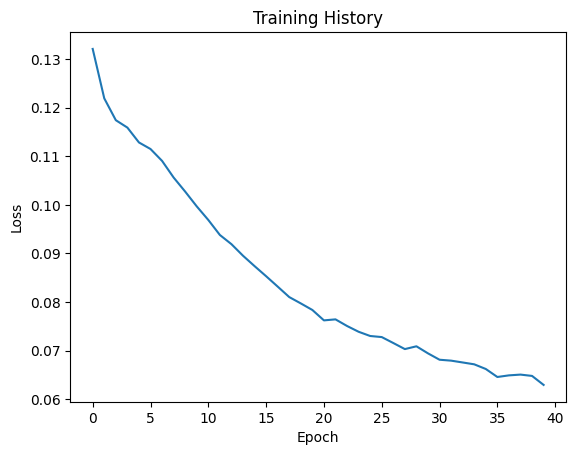

In [22]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate the model on the test dataset
loss = model.evaluate([test['User_Id'], test['Place_Id']], test['Place_Ratings'], verbose=0)

# Print the mean squared error (MSE)
print("Mean Squared Error:", loss)

#Mean Squared Error: 0.21354129910469055

#Mean Squared Error: [0.19598501920700073, 0.3624797761440277]

#Mean Squared Error: 0.18648888170719147

Mean Squared Error: 0.1668909341096878


In [ ]:
model.save('recommendation_rating_model.h5')

In [ ]:
id_place = range(1,20)

In [ ]:
# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(tourism.Place_Id)))
tourism_data[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
id_user = 3

In [ ]:
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Predict

In [ ]:
predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

14/14 [==============================] - 0s 3ms/step


array([299, 252,  64, 231, 398,  96,  21,  31,  59, 185])

In [ ]:
# print predicted scores
predictions[recommended_tourism_ids]

array([0.84892476, 0.8339175 , 0.8268453 , 0.82544655, 0.82064545,
       0.8201959 , 0.81839144, 0.8181211 , 0.81801736, 0.8177401 ],
      dtype=float32)